In [66]:
import requests
from io import BytesIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
%matplotlib inline

In [2]:
maddison=requests.get("https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.xlsx")

In [7]:
with BytesIO(maddison.content) as file:
    data=pd.read_excel(file,sheet_name="Full data")

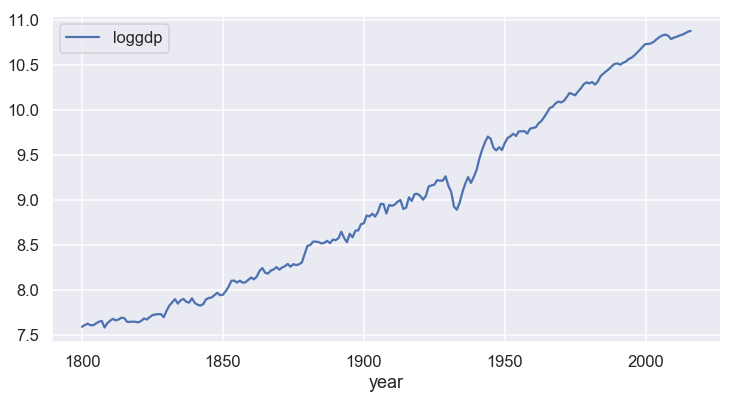

In [33]:
t=(data.query('countrycode=="USA" and year>=1800')
 [['year','cgdppc']].set_index('year')
).rename(columns={'cgdppc':'loggdp'}).pipe(pd.np.log)
t.plot(figsize=(12,6))

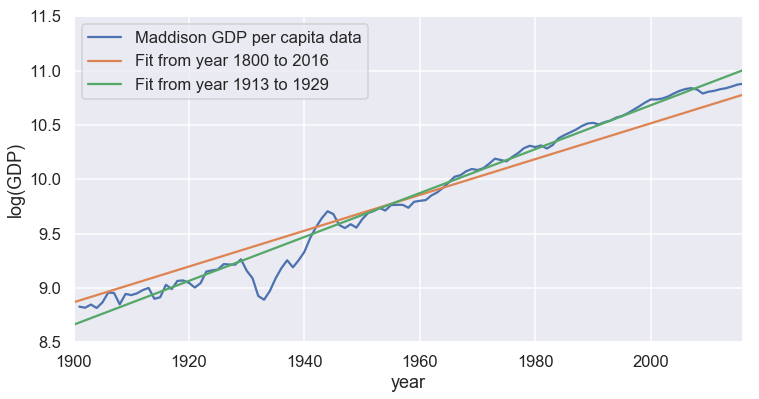

In [126]:
from sklearn.linear_model import LinearRegression
def plot_reg_from(from_year=1800,to_year=2016):
    t2=t[(t.index>=from_year) & (t.index<=to_year)]
    linreg=LinearRegression()
    linreg.fit(t2.index.values.reshape(-1, 1),t2.loggdp)
    pred=linreg.predict(t.index.values.reshape(-1, 1))
    plt.plot(t.index,pred,label=f"Fit from year {from_year} to {to_year}")
this_t=t.query('year>1900')
this_t.rename(columns={'loggdp':"Maddison GDP per capita data"}).plot(figsize=(12,6))
plot_reg_from()
plot_reg_from(from_year=1913,to_year=1929)
plt.legend()
plt.ylabel('log(GDP)')
plt.xlim([1900,2016])
plt.ylim([8.5,11.5])
plt.savefig('us_gdp_growth.png')

In [ ]:
!ls